In [182]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [186]:
vueltas = pd.read_csv("../dataset_todos_pilotos/final/laps_spain_final_v2.csv")
#vueltas.drop(['nextPit'], axis = 1, inplace = True)

In [187]:
#vueltas['makeStop'] = vueltas['makeStop'].shift(-1)#Bahrein
vueltas['makeStop'] = vueltas['makeStop'].shift(1)#Spain
vueltas['makeStop'][0] = 0

/var/folders/pd/wpkltt694qx207z03w_cmlbh0000gn/T/ipykernel_3811/2882609537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vueltas['makeStop'][0] = 0


In [188]:
piloto="hamilton"

#vueltas = vueltas.drop(['Piloto'], axis = 1)

vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020])]
vueltas_validation = vueltas[vueltas['anyo'].isin([2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

#vueltas_train = vueltas_train[vueltas_train['Piloto'] == "hamilton"]

vueltas_validation = vueltas_validation[vueltas_validation['Piloto'] == piloto]
vueltas_test = vueltas_test[vueltas_test['Piloto'] == piloto]

#vueltas_train = vueltas_train.drop(['anyo'], axis=1)
vueltas_validation = vueltas_validation.drop(['anyo'], axis=1)

vueltas_test = vueltas_test.drop(['anyo'], axis=1)
vueltas_train.drop(['Piloto'], axis = 1, inplace = True)
vueltas_test.drop(['Piloto'], axis = 1, inplace = True)
vueltas_validation.drop(['Piloto'], axis = 1, inplace = True)
vueltas_train = vueltas_train.drop(['Stint'], axis=1)
vueltas_validation = vueltas_validation.drop(['Stint'], axis=1)
vueltas_test = vueltas_test.drop(['Stint'], axis=1)

vueltas_train = vueltas_train.astype('float')
vueltas_validation = vueltas_validation.astype(float)
vueltas_test = vueltas_test.astype(float)

/var/folders/pd/wpkltt694qx207z03w_cmlbh0000gn/T/ipykernel_3811/3455975615.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vueltas_train.drop(['Piloto'], axis = 1, inplace = True)


In [189]:
vueltas_train_18 = vueltas_train[vueltas_train['anyo'] == 2018]

vueltas_train_18 = vueltas_train_18.drop('anyo', axis=1)
vueltas_train_18['makeStop'] = vueltas_train_18['makeStop'].astype('int32')
scaler = MinMaxScaler()
scaler.fit(vueltas_train_18)
vueltas_train_scaler_18= scaler.transform(vueltas_train_18)

vueltas_train_19 = vueltas_train[vueltas_train['anyo'] == 2019]

vueltas_train_19 = vueltas_train_19.drop('anyo', axis=1)
vueltas_train_19['makeStop'] = vueltas_train_19['makeStop'].astype('int32')

scaler.fit(vueltas_train_19)
vueltas_train_scaler_19= scaler.transform(vueltas_train_19)

vueltas_train_20 = vueltas_train[vueltas_train['anyo'] == 2020]

vueltas_train_20 = vueltas_train_20.drop('anyo', axis=1)
vueltas_train_20['makeStop'] = vueltas_train_20['makeStop'].astype('int32')

scaler.fit(vueltas_train_20)
vueltas_train_scaler_20= scaler.transform(vueltas_train_20)

In [190]:
vueltas_test_scaler = scaler.transform(vueltas_test)
vueltas_validation_scaler = scaler.transform(vueltas_validation)

In [191]:
trainX = []
trainY = []
testX = []
testY = []
validationX = []
validationY = []
loopback = 8 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler_18) -future +1):
    trainX.append(vueltas_train_scaler_18[i-loopback:i, 0:vueltas_train_18.shape[1]])
    trainY.append(vueltas_train_scaler_18[i + future - 1:i + future,5])
    
for i in range (loopback, len(vueltas_train_scaler_19) -future +1):
    trainX.append(vueltas_train_scaler_19[i-loopback:i, 0:vueltas_train_19.shape[1]])
    trainY.append(vueltas_train_scaler_19[i + future - 1:i + future,5])
    
for i in range (loopback, len(vueltas_train_scaler_20) -future +1):
    trainX.append(vueltas_train_scaler_20[i-loopback:i, 0:vueltas_train_20.shape[1]])
    trainY.append(vueltas_train_scaler_20[i + future - 1:i + future,5])
 
for i in range (loopback, len(vueltas_test_scaler) -future +1):
        testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
        testY.append(vueltas_test_scaler[i + future - 1:i + future,5])
        
    
for i in range (loopback, len(vueltas_validation_scaler) -future +1):
    validationX.append(vueltas_validation_scaler[i-loopback:i, 0:vueltas_validation.shape[1]])
    validationY.append(vueltas_validation_scaler[i + future - 1:i + future,5])

In [192]:
trainX, trainY, testX, testY, validationX, validationY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY), np.array(validationX), np.array(validationY)

In [164]:
model = Sequential()
model.add(LSTM(256, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss= "binary_crossentropy")
model.summary()

2023-08-25 15:31:04.401652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-25 15:31:04.402817: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-25 15:31:04.404250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 8, 256)            282624    
                                                                 
 dropout_17 (Dropout)        (None, 8, 256)            0         
                                                                 
 lstm_18 (LSTM)              (None, 128)               197120    
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 479,873
Trainable params: 479,873
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25


2023-08-25 15:31:04.975802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-25 15:31:04.977552: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-25 15:31:04.978758: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/12 [==========================>...] - ETA: 0s - loss: 0.2780

2023-08-25 15:31:09.171674: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-25 15:31:09.172760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-25 15:31:09.174118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12/12 [==============================] - 5s 150ms/step - loss: 0.2751 - val_loss: 0.1208
Epoch 2/25
12/12 [==============================] - 1s 91ms/step - loss: 0.1422 - val_loss: 0.1012
Epoch 3/25
12/12 [==============================] - 1s 91ms/step - loss: 0.1197 - val_loss: 0.0949
Epoch 4/25
12/12 [==============================] - 1s 96ms/step - loss: 0.1206 - val_loss: 0.0937
Epoch 5/25
12/12 [==============================] - 1s 90ms/step - loss: 0.1181 - val_loss: 0.0929
Epoch 6/25
12/12 [==============================] - 1s 91ms/step - loss: 0.1169 - val_loss: 0.0890
Epoch 7/25
12/12 [==============================] - 1s 90ms/step - loss: 0.1132 - val_loss: 0.0821
Epoch 8/25
12/12 [==============================] - 1s 90ms/step - loss: 0.1057 - val_loss: 0.0714
Epoch 9/25
12/12 [==============================] - 1s 90ms/step - loss: 0.0971 - val_loss: 0.0871
Epoch 10/25
12/12 [==============================] - 1s 91ms/step - loss: 0.0994 - val_loss: 0.0734
Epoch 11/25
12/12 [

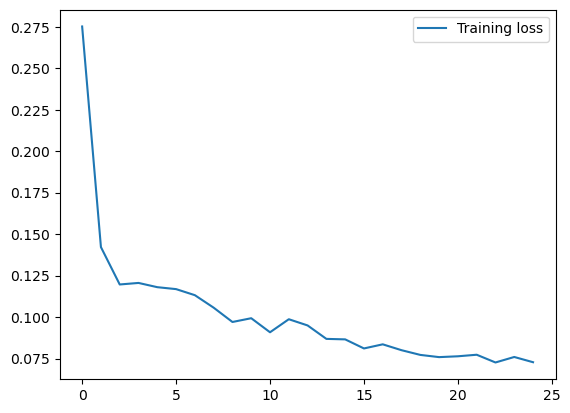

In [165]:
history = model.fit(trainX, trainY, epochs=25, batch_size=256, validation_split=0.05, verbose=1)
plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [166]:
predictions_val = model.predict(validationX)

2023-08-25 15:31:36.526322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-25 15:31:36.529493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-25 15:31:36.531079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 1s 10ms/step


In [167]:
predictions_val[0:50]

array([[8.3438641e-01],
       [8.6135602e-01],
       [8.8696015e-01],
       [9.0052080e-01],
       [9.0313852e-01],
       [8.9541036e-01],
       [8.7551504e-01],
       [8.5402495e-01],
       [8.3989531e-01],
       [8.2370067e-01],
       [8.2632303e-01],
       [8.2912040e-01],
       [8.3188212e-01],
       [8.3384609e-01],
       [7.8407091e-01],
       [7.0173633e-01],
       [6.2038445e-01],
       [5.6376863e-01],
       [5.2669287e-01],
       [5.0591195e-01],
       [4.8849493e-01],
       [4.3400660e-01],
       [7.1647233e-01],
       [7.1769142e-01],
       [7.2108269e-01],
       [7.2488010e-01],
       [7.3196131e-01],
       [7.3731673e-01],
       [7.4266213e-01],
       [7.4789828e-01],
       [7.4746501e-01],
       [6.5215236e-01],
       [4.9885455e-01],
       [3.0748969e-01],
       [1.3195886e-01],
       [3.3374920e-02],
       [5.0967536e-03],
       [7.6729251e-04],
       [3.6885648e-04],
       [5.5860676e-02],
       [6.3895665e-02],
       [7.415533

### Sacamos el threeshold con los datos de entrenamiento

In [168]:
import numpy as np
from sklearn.metrics import roc_curve


# Etiquetas reales (0 o 1 según la clase verdadera)
true_labels = validationY

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(true_labels, predictions_val)

# Encontramos el umbral que maximiza la suma de sensibilidad y especificidad
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]


print("El umbral óptimo según la curva ROC es:", optimal_threshold)



El umbral óptimo según la curva ROC es: 0.747465


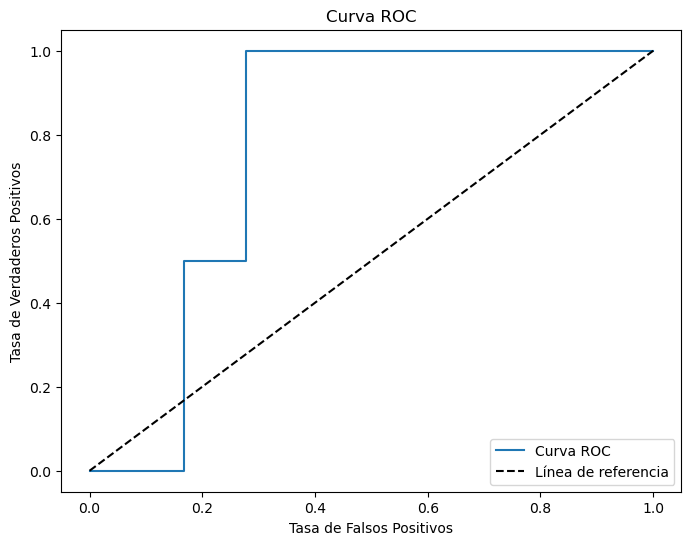

In [169]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Línea de referencia')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

### Sacamos las predicciones del año 2022

In [170]:
predictions = model.predict(testX)

2/2 [==============================] - 0s 8ms/step


In [171]:
predictions

array([[0.7680726 ],
       [0.7842222 ],
       [0.79575163],
       [0.8042877 ],
       [0.81048614],
       [0.814887  ],
       [0.7927954 ],
       [0.7369964 ],
       [0.6427143 ],
       [0.5891941 ],
       [0.50932986],
       [0.3866911 ],
       [0.22777304],
       [0.07518943],
       [0.6285421 ],
       [0.6373721 ],
       [0.64761233],
       [0.6582285 ],
       [0.6694827 ],
       [0.6039329 ],
       [0.50061226],
       [0.37528938],
       [0.23583537],
       [0.11192749],
       [0.03749897],
       [0.00990995],
       [0.0026457 ],
       [0.12147107],
       [0.13342384],
       [0.1528199 ],
       [0.16565318],
       [0.17888136],
       [0.19152008],
       [0.20402938],
       [0.21545094],
       [0.22643375],
       [0.24087547],
       [0.24715698],
       [0.14284043],
       [0.07717368],
       [0.03842221],
       [0.01751226],
       [0.0080279 ],
       [0.00340435],
       [0.0014693 ],
       [0.00095737],
       [0.04534267],
       [0.052

In [172]:
predictions[predictions>optimal_threshold] =1.0

In [173]:
predictions[predictions<=optimal_threshold] = 0.0

In [174]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [175]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
metricas = classification_report(testY, predictions)
print(metricas)


              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        52
         1.0       0.14      0.33      0.20         3

    accuracy                           0.85        55
   macro avg       0.55      0.61      0.56        55
weighted avg       0.91      0.85      0.88        55



In [176]:
def calculate_accuracy_within_range(real_values, predicted_values, within_range=2):
    real_values = np.ravel(real_values).astype(int)
    predicted_values = np.ravel(predicted_values).astype(int)

    stop_indexes = np.where(real_values == 1)[0]

    correct_laps = []

    for stop_index in stop_indexes:
        start_index = max(0, stop_index - within_range + 1)
        #Esto lo hago para que no se me pase de la ultima vuelta
        end_index = min(len(predicted_values), stop_index + within_range) 

        if 1 in predicted_values[start_index:end_index + 1]:
            correct_laps.append(stop_index+1)

    precision = len(correct_laps) / len(stop_indexes) if len(stop_indexes) > 0 else 0

    return precision, correct_laps

In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

metricas = classification_report(testY, predictions)
print(metricas)

rango = 2
accuracy, correct_laps = calculate_accuracy_within_range(testY, predictions, within_range=rango)
print(f"Exactitud dentro del rango de vueltas: {accuracy:.2f}")
print(f"Vueltas en las que se ha acertado la parada o está dentro del rango con rango seteado a {rango}: {correct_laps}")

precision = accuracy  # En este caso, la precisión es igual a la exactitud dentro del rango
recall = 1.0  # Recall es 1.0, ya que solo estamos considerando las paradas reales dentro del rango
f1_score = 2 * (precision * recall) / (precision + recall)  # Calculamos el F1-score

print(f"Precisión: {precision:.2f}")
print(f"F1-score: {f1_score:.2f}")

accuracy, correct_laps = calculate_accuracy_within_range(testY, predictions, within_range=0)
print(f"Exactitud sin rango de vueltas: {accuracy:.2f}")

precision = accuracy  # En este caso, la precisión es igual a la exactitud dentro del rango
recall = 1.0  # Recall es 1.0, ya que solo estamos considerando las paradas reales dentro del rango
f1_score = 2 * (precision * recall) / (precision + recall)  # Calculamos el F1-score

print(f"Precisión: {precision:.2f}")
print(f"F1-score: {f1_score:.2f}")

print(f"El threeshold ha sido: {optimal_threshold}")

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        52
         1.0       0.14      0.33      0.20         3

    accuracy                           0.85        55
   macro avg       0.55      0.61      0.56        55
weighted avg       0.91      0.85      0.88        55

Exactitud dentro del rango de vueltas: 0.33
Vueltas en las que se ha acertado la parada o está dentro del rango con rango seteado a 2: [6]
Precisión: 0.33
F1-score: 0.50
Exactitud sin rango de vueltas: 0.00
Precisión: 0.00
F1-score: 0.00
El threeshold ha sido: 0.7474650144577026
